# Logistic regression

Es un algoritmo supervisado que pertenece a los algoritmos de clasificación. Este no busca entregarnos un valor continuo si no que buscar entregar valores de 0 o 1. Es importante la desambiguación porque es cierto que en regresión lineal buscamos predecir valores continuos. La regresión logistica usa la función sigmoidal, que va desde 0 a 1, un intervalo probabilistico para las observaciones.

¿Qué probabilidad tiene una observación o dato de estar en 0 o en 1?
Podemos hacer una gráfica de Probabilidad de Aprobar vs Horas de estudio, y graficar algunos puntos de datos de estudiantes que practican desde 0 a n horas, cada punto de datos se puede mapear a la función sigmoide para mapear una probabilidad tal que:

Si está entre [0.5-1] el estudiante tiene mejores chances de éxito.
Si está entre [0-0.5) el estudiante tiene menos chances de ganar.
Manejenado los intervalos de probabilidad podemos realizar clasificaciones binarias de si y no.

In [3]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LogisticRegression

## Cargar datos

In [4]:
digits = load_digits()


In [5]:
# ver el primer datapoint
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [6]:
# redimensionr la estructura de un datapoint (8x8)
image = np.reshape(digits.data[0], (8, 8))
print(image)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


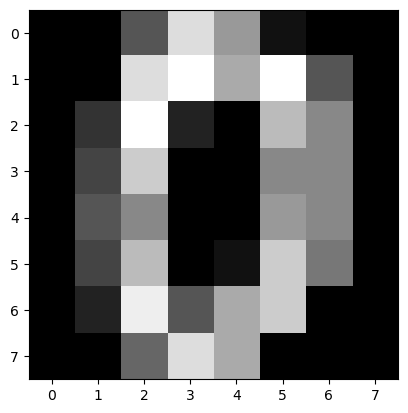

In [7]:
# visualizar el primer endpoint
plt.imshow(image, cmap='gray')

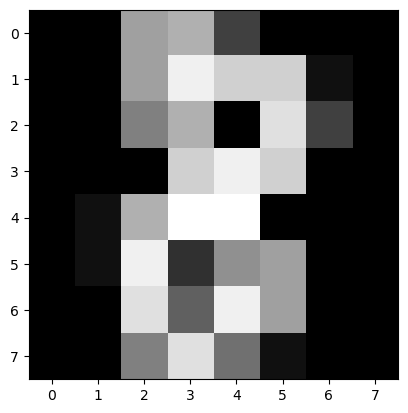

In [14]:
# visualizar otro ejemplo
image2 = np.reshape(digits.data[28], (8, 8))
plt.imshow(image2, cmap='gray')

In [15]:
# ver que numero es en el target
digits.target[28]

8

## Split de datos en train y test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# separar los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [19]:
# tamaños de los datos
print('X train: ', X_train.shape)
print('X test: ', X_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

X train:  (1437, 64)
X test:  (360, 64)
y train:  (1437,)
y test:  (360,)


## Entranamiento del modelo

In [20]:
# instanciando el modelo
logistic_reg = LogisticRegression()
# entrenamiento
logistic_reg.fit(X_train, y_train)

/home/arnol/anaconda3/envs/logistic-regression/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluación del modelo

In [21]:
predictions = logistic_reg.predict(X_test)
print(predictions)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 9 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
# validar las preducciones con respecto al valor real usando la matriz de confusion
cm =confusion_matrix(y_test, predictions)
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


Text(0.5, 137.22222222222217, 'predicted label')

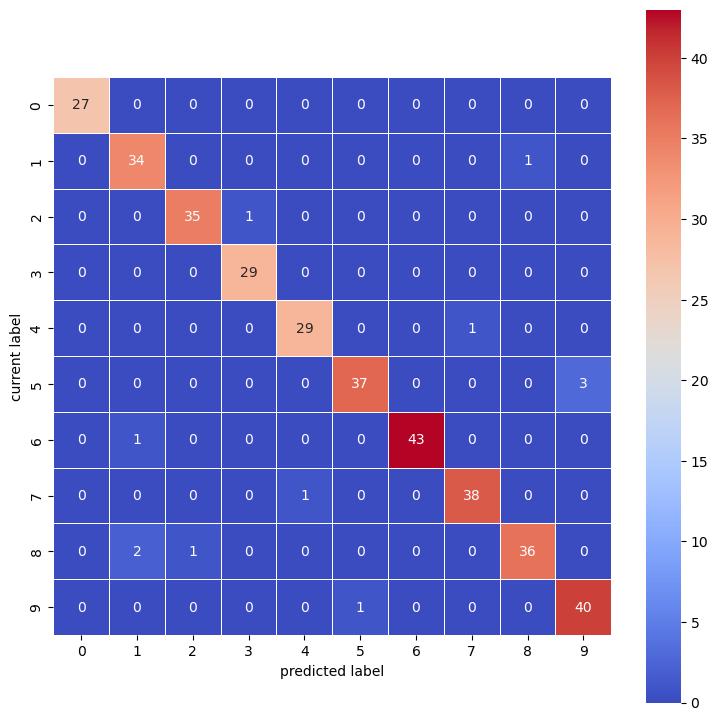

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('current label')
plt.xlabel('predicted label')

## Ventajas
+ Facil de implementar.
+ Coeficientes interpretables.
+ Inferencia de la importancia de cada característica.
+ Clasificación en porcentajes.
+ Excelentes resultados con dataset linealmente separables.
+ Extendido a clasificación multiple

## Desventajas
+ Asume linealidad entre las variables dependientes.
+ Overfitting sobre datasets de alta dimensionalidad.
+ Le afecta la multicolinealidad de variables.
+ Mejores resultados con datasets grandes.

## ¿Cuando usarla?
+ Sencillo y rápido.
+ Probabilidades de ocurrencia sobre un evento categórico.
+ Dataset linealmente separable.
+ Dataset grandes.
+ Datasets balanceados.

![logisticregression](./logistic-regression.png)

$$
1 \over 1+e^{-\log({p \over 1-p})}
$$

odds  = $p \over 1-p$ (Probailidad que el evento sea exitoso) / 1 - Probailidad que el evento sea exitoso) => El ratio de que el evento ocurra sobre la probabilidad de que no ocurra.

log oods: se agrega logaritmo para manejar los valores infinitos y que los valores tiendan (queden todos alrededor) a cero

Odds of winning = 4/6 = 0.6666 
log(Odds of winning) = log(0.6666) = -0.176
Odds of losing = 6/4 = 1.5
log(Odds of lossing) = log(1.5) = 0.176

### Relación entre la regresion lineal y logistica
partiendo con la formula de la regresión lineal
$$
 Y = \beta_0 + \beta_1X
$$
$$
    \log({p \over 1-p}) = \beta_0 + \beta_1X
$$

![despeje](./despeje.png)

$$
    p = {1 \over 1+e^{(-\beta_0 + \beta_1X)}}
$$

La regresión lineal es la que va resolver la dependencia entre las variables para saber si es negativo o positivo, falso verdadero, cero o uno, al aplicarle la función sigmoide me lo da en terminos de probabilidades.



![relacion-regr-lineal-logistica](./relacion-regr-lineal-logistica.png)
